## Experimentation guided example


Over the past several lessons, you've walked through many of the elements of good experimentation; you learned about statistical tests, research proposals, and more. But things are always a little different in the real world, so now you're going to put many of these elements together and walk through an example of what an experiment might look like when you're actually running it in a business setting.

### Setting the stage

For this example, you're going to use a generic marketing scenario focused on email conversion. Many companies in a variety of industries run email campaigns to get people to sign up for services.  Even if your interest is not in marketing, any experiment designed to elicit a discrete response will be similarly constructed.

In this scenario, imagine that you work for a social networking site called BlueBird. BlueBird has been using the same advertising email for years, and some at the company are starting to feel that it's getting a little stale. Ever the data-driven individual, you propose an experiment. The marketing department draws up a new version of the email, and you plan to conduct an A/B test comparing the two emails.

### Before rollout

You may want to roll out the experiment right away, but there is lots to do beforehand! Getting an experiment ready to go out the door is serious business. It will make everything that comes after easier and help ensure that you're making well-thought-out decisions all the way through.

Now, the research proposal (or similar document) can play a huge role in this prep process. It should contain a detailed description of the motivation of the experiment, what exactly the change is, and a plan for rollout. For this experiment, a few elements of the research proposal will be highlighted, rather than a report on the whole document. You will need the following elements:

- **Copy of both emails:** This is useful so that anyone looking into the experiment can use the research proposal to actually see what happens.

- **Rollout plan:** Knowing how many people you intend to treat with your new email and how long this is going to take is important. It's not only a key aspect of the experiment itself, but it's also something that you're likely to be asked about by other people who care about the outcome. Although 50:50 rollouts are the fastest, a gradual rollout will be used to ensure that there are no negative consequences of the experiment. And if things are broken or severely degraded, it can be rolled back quickly. In this case, you'll do two weeks at 10% and then two weeks at 50%. That will lead to a little more than 30,000 people in treatment, which is a nice-sized sample. **Note:** If you want to do a more rigorous calculation of sample size, you can do power calculations beforehand. *Power* is the probability of rejecting a false null hypothesis. This uses the formula for t-tests to see what effect would be detectable at a given sample size, also referred to as $N$.

- **Success metric:** It may seem obvious, but defining success before rolling out an experiment is essential. Usually, this means picking the key metric of interest and setting the degree of significance that you want to have. For a t-test, this is typically a p-value of `0.05`, and that's what you'll do here. The success metric will be sign-ups (also called conversions).

- **Secondary metrics:** It's easier to evaluate success if you have one success metric, but that doesn't mean that's all you look at. There can be many other metrics of interest, and monitoring them will ensure that you aren't having an adverse effect on other things that matter. In this case, your secondary metric can be the time from email to sign-up.

#### Other things to do

You should also test the infrastructure, if any, before rolling out. In this case, that means making sure that the email is set up properly so that it can be sent out when the experiment turns on. If it's manual, that's pretty easy—just make sure that it's formatted properly and that the email is generally deliverable. If you use a service, sending some test emails to test accounts is probably a good idea. This can be either an engineering or a data science task, depending on complexity.

Make sure that you have a method for randomly sampling subjects, and that you know if people stay in test or control permanently. This can matter for something like emails if people receive multiple messages. Should they only receive the new style of email, or should each email be random? For simplicity in this scenario, you can assume that each individual is only emailed once.

This is also a good time to check if there is any potential collision with other events or experiments. You want to run experiments in times that are representative of standard operations (unless your experiment is explicitly about how to handle an extreme situation). If you were testing marketing strategies for football betting behavior right before the Super Bowl, for example, you might see some weird behaviors that would make your findings not broadly applicable. You also don't want to test two related things at the same time.

Another consideration is *segmentation* of your sample. Sometimes you don't want to test on the entire population. Maybe you'll pick specific cities (in which case it may be appropriate to sample those in a representative fashion) or test a specific age group or tenure of user. Make these decisions early, because they will help inform later analysis and possibly how the experiment is functionally set up. For now, just assume that your population is small enough that you can test on the entire population.

Finally, it is good practice to give everyone a chance to review the research proposal and provide feedback. Some companies do this through a kickoff meeting, while other companies may have less formal processes. Make sure that everyone involved is aware of the plan and has bought in before you start the rollout.

After all of this is done and the boxes are all checked, you're ready to roll. Now, imagine that you flipped the switch and turned the experiment on at 10% on April 1, 2016.

### Two weeks in

Of course, you would monitor the experiment throughout its time in the wild, but two weeks in when considering turning up the proportion is a good time to do some analytics to see how things are performing before you roll forward to 50%.

You have [a CSV file](https://github.com/Thinkful-Ed/data-201-resources/blob/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv) for what the data looks like up to this point. Save this file to your local environment in the same folder as your Notebook, and call it `experiment_data_2_wks.csv`.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [0]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

Take a look at the data:

In [0]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


If the date columns are a timestamp instead of a date, you may want to use `pd.DatetimeIndex()` to get just the date. That could look something like the cell below:

In [ ]:
# experiment_data['date'] = pd.DatetimeIndex(experiment_data['timestamp']).date

 Here, `treatment_date` shows when the email was sent, `test` is a binary indicator for if they were in test or control, `is_signed_up` shows if the individual successfully signed up, and `signup_date` is the date of sign-up.

How does this test seem to be performing? Write some code to see.

Answer the questions below about this data to see how the experiment is developing.

In [0]:
# How large is each group?



# What is the sign-up rate of test and control?



# Is the experiment already significant?



Here's an example of how this code could look. Don't look at it until after trying on your own!

In [0]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.test == 1]))
print('control sample size:', len(experiment_data[experiment_data.test == 0]))
print('test proportion:', experiment_data.test.mean())
print()

# What is the sign-up rate of test and control?
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())

# Are the test and control groups significantly different?
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up)

test sample size: 3372
control sample size: 30241
test proportion: 0.10031832921786214

test signup rate: 0.13701067615658363
control signup rate: 0.14708508316523924


Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

So the groups are not significantly different, and indications do not seem great. The test sign-up rate seems lower than the old message. Can you see any reason why?

Use the cell below to write some code to investigate. It might be worth looking at the secondary metric.

In [0]:
# Your code here


Here's another example of how this code could look. Again, don't look at it until after trying on your own.

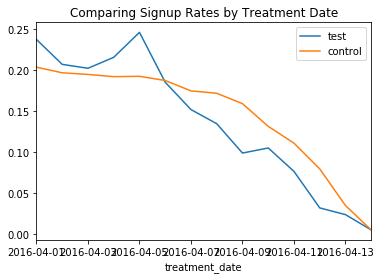

T-Test Results by Date
Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.6953630758340448)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.8094651742723448)
Ttest_indResult(statistic=1.006146671265253, pvalue=0.3144281887767212)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.0727950243234006)
Ttest_indResult(statistic=-0.07142256949339083, pvalue=0.9430681183812821)
Ttest_indResult(statistic=-0.99645401324533, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.1598930922410899)
Ttest_indResult(statistic=-2.772772511643487, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.559540254853317, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.851793126290792, pvalue=0.3944212121535955)
Ttest_indResult(

In [0]:
# Some example code


fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))

By visualizing the results over time, you can see that the test group is converting slower than the control group. But if you look just at the group treated in the first few days, they're not that different in sign-up rate. The rates seem to converge as time passes after sending the email.

This means the difference could be a time effect rather than a rate effect. Time plays a huge role in almost all experiments; not all behaviors are immediate. Sometimes, it takes a while to figure out a new feature. Other times, there is novelty effect from the new feature, and that leads to a spike in activity. Letting these things play out is an inexact, but important, feature of experimental design.

You could wait here, but the time effect should leave you comfortable that any damage to sign-up rate will get lower with time. The data indicates that you're safe to roll out to 50% for another two weeks.

## Experiment wrap-up

Two more weeks go by and you have enough people in your sample, so you now turn the experiment off. No more users will be given a test email. Now it's time to analyze what happened and see how the new email is performing.

This [final dataset](https://github.com/Thinkful-Ed/data-201-resources/blob/master/1.4.11_experimentation_guided_example/experiment_data_final.csv) comes from a few weeks after the experiment is turned off, to account for some of those time effects. Again, save this file in the same folder as your Notebook.

Now, answer the same basic questions again.

In [0]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [0]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.test == 1]))
print('control sample size:', len(experiment_data[experiment_data.test == 0]))
print('test proportion:', experiment_data.test.mean())
print()

# What is the sign-up rate of test and control?
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())

# Is the experiment already significant?
stats.ttest_ind(
    experiment_data[experiment_data.test == 1].is_signed_up,
    experiment_data[experiment_data.test == 0].is_signed_up)

test sample size: 19861
control sample size: 46867
test proportion: 0.2976411701234864

test signup rate: 0.2421328231206888
control signup rate: 0.19937269293959503


Ttest_indResult(statistic=12.368130184147793, pvalue=4.248167714911685e-35)

Nice! This experiment got very significant after allowing for more time. How about creating another visualization to tell the story of the effect of the new email?

Write your code in the cell below:

In [0]:
# Your code here



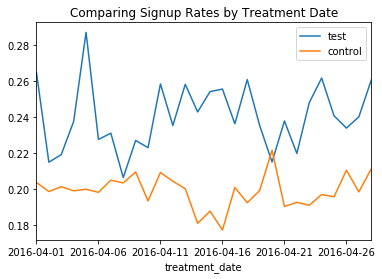

In [0]:
# Some example code


fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()

Great! So what are the conclusions from this experiment?

The new email seems to be a significant improvement on the old email, but at a slower rate of conversion. So as long as BlueBird isn't desperate for sign-ups in the next few days, the change seems worth it. In this case, however, it would also be worth working with the advertising and engineering teams to see if you could figure out why conversion was slower for the test email. That could inform whether the effect might change over time.


## Conclusions

This analysis, although comprehensive, is not exhaustive. There are plenty of more topics and dimensions that could be explored. Talk with your mentor about how you might expand this experiment or other dimensions you may want to investigate.



One last thing: it's worth having an additional note on t-testing here again. You used a t-test in this exercise, but you could actually use a different test to gain a bit more power. Because the sample is a proportion, you know more about their distributions than the t-test assumes. Specifically, the distribution of the mean is normal, meaning that you could use something called a two-sample proportional z-test. You haven't learned about this test yet, but here's [a primer on z-tests](https://www.statisticshowto.com/z-test/). Find a Python implementation for this test and go back and revise your testing. What difference does the new test make?